#Pre-processing data

##Load Dataset

In [1]:
!gdown "16h_mWdWCsAQeO2cu_AccT1d1pW9WP60t"

Downloading...
From: https://drive.google.com/uc?id=16h_mWdWCsAQeO2cu_AccT1d1pW9WP60t
To: /content/data_ws.zip
100% 21.8M/21.8M [00:00<00:00, 92.1MB/s]


In [2]:
!unzip data_ws.zip

Archive:  data_ws.zip
   creating: data_ws/
  inflating: data_ws/ws_0.jpg        
  inflating: data_ws/ws_1.jpg        
  inflating: data_ws/ws_10.jpg       
  inflating: data_ws/ws_100.jpg      
  inflating: data_ws/ws_1000.jpg     
  inflating: data_ws/ws_1001.jpg     
  inflating: data_ws/ws_1002.jpg     
  inflating: data_ws/ws_1003.jpg     
  inflating: data_ws/ws_1004.jpg     
  inflating: data_ws/ws_1005.jpg     
  inflating: data_ws/ws_1006.jpg     
  inflating: data_ws/ws_1007.jpg     
  inflating: data_ws/ws_1008.jpg     
  inflating: data_ws/ws_1009.jpg     
  inflating: data_ws/ws_101.jpg      
  inflating: data_ws/ws_1010.jpg     
  inflating: data_ws/ws_1011.jpg     
  inflating: data_ws/ws_1012.jpg     
  inflating: data_ws/ws_1013.jpg     
  inflating: data_ws/ws_1014.jpg     
  inflating: data_ws/ws_1015.jpg     
  inflating: data_ws/ws_1016.jpg     
  inflating: data_ws/ws_1017.jpg     
  inflating: data_ws/ws_1018.jpg     
  inflating: data_ws/ws_1019.jpg     
  infl

(240, 426, 3)


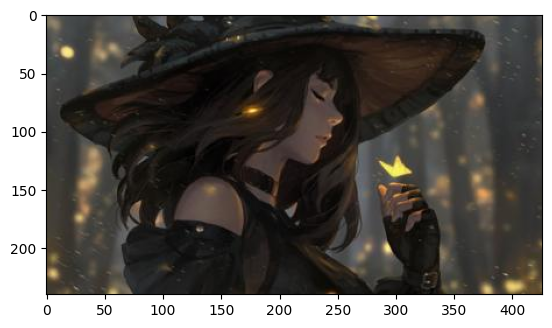

In [3]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('data_ws/ws_0.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
print(img.shape)

#Splitting dataset to train, test and val

In [4]:
import os
import random
import pandas as pd

# Path to your image folder
data_ws_dir = "/content/data_ws/"

# Get all image file paths
all_images = [os.path.join(data_ws_dir, filename) for filename in os.listdir(data_ws_dir)]

# Shuffle the paths randomly
random.shuffle(all_images)

# Split paths
train_data_ws = all_images[:967]
remaining_data_ws = all_images[967:]
test_data_ws = remaining_data_ws[:len(remaining_data_ws)//2]
val_data_ws = remaining_data_ws[len(remaining_data_ws)//2:]

print(f"Images have been randomly distributed: {len(train_data_ws)} to train, {len(test_data_ws)} to test, and {len(val_data_ws)} to val subfolders.")

Images have been randomly distributed: 967 to train, 121 to test, and 121 to val subfolders.


In [5]:
# # Write to CSV files
# train_df = pd.DataFrame({"image_path": train_data_ws})
# test_df = pd.DataFrame({"image_path": test_data_ws})
# val_df = pd.DataFrame({"image_path": val_data_ws})

# train_df.to_csv("train.csv", index=False) # train_img.csv
# test_df.to_csv("test.csv", index=False) # test_img.csv
# val_df.to_csv("val.csv", index=False) #val_img.csv

In [6]:
# train_df2list = train_df['image_path'].tolist()
# test_df2list = test_df['image_path'].tolist()
# val_df2list = val_df['image_path'].tolist()

In [7]:
# train_df2list[:5]

In [8]:
# img = cv2.imread(train_df2list[0])
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# plt.imshow(img)
# print(img.shape)

##Convert Images to numpy Array

In [9]:
from PIL import Image
import numpy as np

def image2array(csv_path, image_dir):
    """
    Load images from a CSV file containing image paths.

    Args:
        csv_path (str): Path to the CSV file with image paths.
        image_folder (str): Path to the folder containing the images.

    Returns:
        list of numpy.ndarray: List of image arrays.
    """
    image_paths_df = pd.read_csv(csv_path)
    image_paths = image_paths_df['image_path'].tolist()

    image_arrays = []
    for img_path in image_paths:
        img_full_path = os.path.join(image_dir, img_path)
        img = Image.open(img_full_path)
        img_array = np.array(img)
        image_arrays.append(img_array)

    return image_arrays

In [10]:
# train_csv_path = 'train.csv'
# test_csv_path = 'test.csv'
# val_csv_path = 'val.csv'

# image_dir_path = '/content/data_ws'

# train_images_arr = image2array(train_csv_path, image_dir_path)
# test_images_arr = image2array(test_csv_path, image_dir_path)
# val_images_arr = image2array(val_csv_path, image_dir_path)

# print(f"Converted {len(train_images_arr)} train images to array.")
# print(f"Converted {len(test_images_arr)} test images to array.")
# print(f"Converted {len(val_images_arr)} val images to array.")

In [11]:
# len(train_images_arr)

In [12]:
# test_images_arr[0]

In [13]:
# val_images_arr[0]

#Model Implementation

In [14]:
import tensorflow as tf
from keras.applications import VGG19, ResNet50
from keras.preprocessing.image import load_img, img_to_array

In [15]:
vgg19 = VGG19(weights='imagenet', include_top=False)
resnet50 = ResNet50(weights='imagenet', include_top=False)

94765736/94765736 [==============================] - 5s 0us/step


In [16]:
def load_images(image_paths):
    images = []
    for img_path in image_paths:
        img = load_img(img_path, target_size=(240, 426))
        img_array = img_to_array(img)
        images.append(img_array)
    return np.array(images)

train_images = load_images(train_data_ws)

In [48]:
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg19 import preprocess_input as vgg19_preprocess_input
from keras.applications.resnet50 import preprocess_input as resnet50_preprocess_input

input_image_path = test_data_ws[9]
input_image = load_img(input_image_path, target_size=(240, 426))
input_array = img_to_array(input_image)
input_array = np.expand_dims(input_array, axis=0)

input_vgg19 = vgg19_preprocess_input(input_array)
input_resnet50 = resnet50_preprocess_input(input_array)

input_vgg19_features = vgg19.predict(input_vgg19)
input_resnet50_features = resnet50.predict(input_resnet50)

1/1 [==============================] - 0s 95ms/step


In [49]:
# Preprocess your training images
train_images_vgg19 = vgg19_preprocess_input(train_images)
# Use VGG19 to predict the features of your training images
train_images_vgg19_features = vgg19.predict(train_images_vgg19)

# Preprocess your training images for ResNet50
train_images_resnet50 = resnet50_preprocess_input(train_images)
# Use ResNet50 to predict the features of your training images
train_images_resnet50_features = resnet50.predict(train_images_resnet50)

31/31 [==============================] - 5s 173ms/step


In [19]:
# input_vgg19_flat = vgg19_feature.reshape(vgg19_feature.shape[0], -1)
# input_resnet50_flat = resnet50_feature.reshape(resnet50_feature.shape[0], -1)

In [50]:
# Flatten the 4D array into a 2D array
input_vgg19_features_flat = input_vgg19_features.reshape(input_vgg19_features.shape[0], -1)
train_images_vgg19_features_flat = train_images_vgg19_features.reshape(train_images_vgg19_features.shape[0], -1)

# Flatten the 4D array into a 2D array for ResNet50 features
input_resnet50_features_flat = input_resnet50_features.reshape(input_resnet50_features.shape[0], -1)
train_images_resnet50_features_flat = train_images_resnet50_features.reshape(train_images_resnet50_features.shape[0], -1)

In [51]:
from sklearn.metrics.pairwise import cosine_similarity

def compute_similarity(input_features, train_features):
    similarity_scores = cosine_similarity(input_features, train_features)
    return similarity_scores

# Compute similarity scores for VGG19 features
similarity_scores = cosine_similarity(input_vgg19_features_flat, train_images_vgg19_features_flat)
similarity_scores_flat = similarity_scores.flatten()

# Compute similarity scores for ResNet50 features
similarity_scores_resnet50 = cosine_similarity(input_resnet50_features_flat, train_images_resnet50_features_flat)
similarity_scores_resnet50_flat = similarity_scores_resnet50.flatten()

# Get indices of images sorted by similarity scores
sorted_indices = np.argsort(similarity_scores_flat)
# Get indices of images sorted by similarity scores for ResNet50 features
sorted_indices_resnet50 = np.argsort(similarity_scores_resnet50_flat)

# Get top 5 most similar images
top_5_indices = sorted_indices[-5:]
# Get top 5 most similar images for ResNet50 features
top_5_indices_resnet50 = sorted_indices_resnet50[-5:]

# Get similarity scores of top 5 images
top_5_similarity_scores = [similarity_scores_flat[i] for i in top_5_indices]
# Get similarity scores of top 5 images for ResNet50 features
top_5_similarity_scores_resnet50 = [similarity_scores_resnet50_flat[i] for i in top_5_indices_resnet50]

# Print similarity scores of top 5 images
for idx in top_5_indices:
    print(f"Image {idx} Similarity Score: {similarity_scores_flat[idx]}")

# Print similarity scores of top 5 images for ResNet50 features
for idx in top_5_indices_resnet50:
    print(f"Image {idx} Similarity Score (ResNet50): {similarity_scores_resnet50_flat[idx]}")

Image 305 Similarity Score: 0.2381066232919693
Image 870 Similarity Score: 0.23887906968593597
Image 966 Similarity Score: 0.24303947389125824
Image 787 Similarity Score: 0.24530981481075287
Image 376 Similarity Score: 0.24959899485111237
Image 848 Similarity Score (ResNet50): 0.2182057648897171
Image 866 Similarity Score (ResNet50): 0.21828559041023254
Image 538 Similarity Score (ResNet50): 0.21845634281635284
Image 790 Similarity Score (ResNet50): 0.21948596835136414
Image 333 Similarity Score (ResNet50): 0.2199600338935852


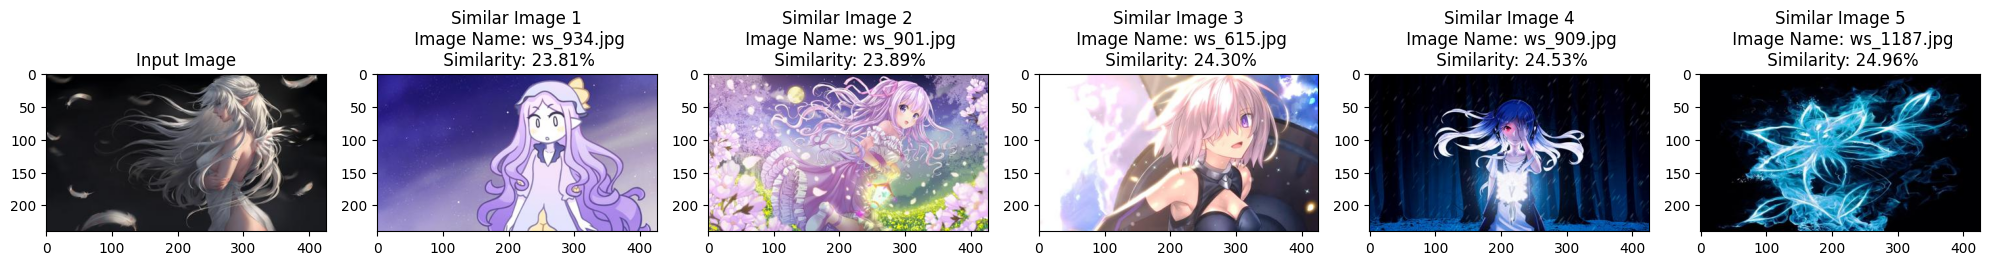

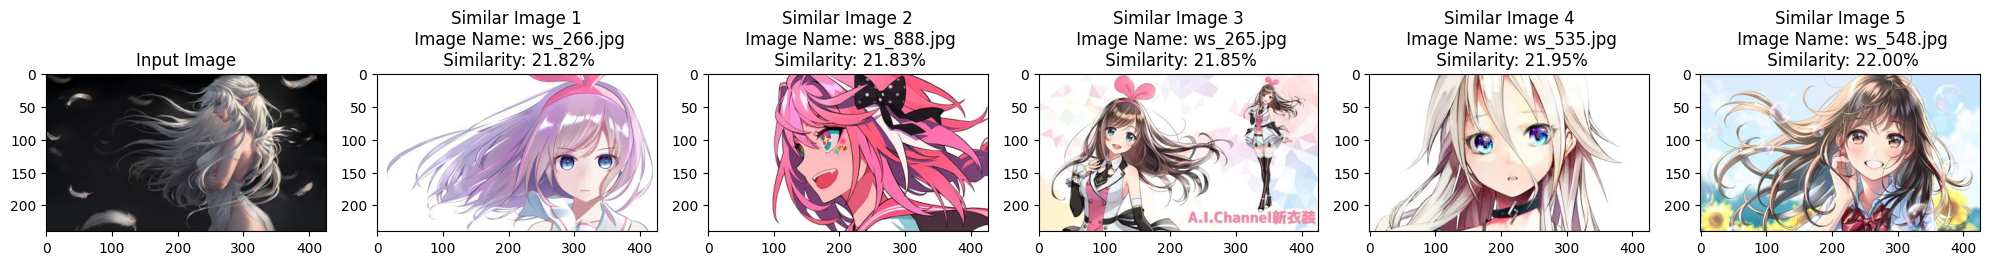

In [54]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def visualize_images(image_paths, similarity_scores):
    fig = plt.figure(figsize=(20, 10))

    # Display input image
    ax = fig.add_subplot(1, 6, 1)
    img = mpimg.imread(image_paths[0])
    ax.imshow(img)
    ax.set_title("Input Image")

    # Display top 5 similar images
    for i in range(5):
        ax = fig.add_subplot(1, 6, i+2)
        img = mpimg.imread(image_paths[i+1])
        ax.imshow(img)
        image_name = os.path.basename(image_paths[i+1])
        ax.set_title(f"Similar Image {i+1}\n Image Name: {image_name}\n Similarity: {similarity_scores[i]:.2%}")

    plt.tight_layout()
    plt.show()

# Get paths of top 5 similar images
top_5_image_paths = [train_data_ws[i] for i in top_5_indices]
top_5_image_paths_resnet50 = [train_data_ws[i] for i in top_5_indices_resnet50]

# Add the input image path to the beginning of the list
image_paths = [input_image_path] + top_5_image_paths
image_paths_resnet50 = [input_image_path] + top_5_image_paths_resnet50

# Visualize images
visualize_images(image_paths, top_5_similarity_scores)
visualize_images(image_paths_resnet50, top_5_similarity_scores_resnet50)
